<a href="https://colab.research.google.com/github/Krankile/npmf/blob/main/notebooks/distribution_m4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Setup

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%%capture
!git clone https://github.com/Krankile/npmf.git

##General setup

In [3]:
%%capture
!cd npmf && git pull
from npmf.utils.colors import main,main2,main3

In [4]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [70]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from pathlib import Path
from scipy.stats import kurtosis
from scipy.stats import norm

In [6]:
ROOT = Path("drive/MyDrive/Master, Ankile og Krange/Master")

In [7]:
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=[main, main2, main3,"black"]) 

# Analyse the distirbution of M4 monthly data vs. a gaussian distribution

 Start by collecting m4 data

In [8]:
df_test = pd.read_feather(ROOT/"Data/arima_nn/monthly_test_48.feather").set_index("V1")
df_train = pd.read_feather(ROOT/"Data/arima_nn/monthly_train_48.feather").set_index("V1")

In [9]:
df_return = (df_test.diff(axis=1).iloc[:,1:]/df_test.iloc[:,:-1].values)

In [10]:
df_return

,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19
V1,,,,,,,,,,,,,,,,,
M1,-0.106651,-0.387677,0.060797,-0.067194,-0.057203,0.150562,0.164062,0.100671,-0.253049,-0.077551,0.630531,0.227951,-0.140331,-0.308483,-0.126394,-0.044681,-0.106904
M2,0.043062,-0.192661,0.301136,-0.344978,-0.086667,0.321168,-0.198895,-0.055172,0.007299,0.239130,0.251462,-0.126168,-0.106952,0.077844,0.000000,-0.005556,-0.106145
M3,0.025913,0.013178,-0.010550,0.000584,0.013138,-0.001369,-0.006348,-0.007042,0.019522,0.005666,-0.016402,-0.002973,0.004799,0.006007,0.011222,-0.001423,0.008620
M4,0.008301,-0.005031,-0.004137,-0.000615,-0.006928,0.001240,-0.003716,0.001710,-0.009775,0.001254,0.000000,-0.005790,-0.002518,-0.008995,0.000637,0.017982,0.005628
M5,0.018223,-0.026846,0.016092,0.013575,-0.008929,-0.022523,-0.013825,-0.016355,0.016627,0.016355,-0.013793,0.006993,0.011574,0.004577,0.020501,-0.020089,-0.002278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
M47996,0.162033,0.170573,0.026280,0.112900,-0.443097,0.181270,-0.134355,0.023089,-0.109077,-0.292429,-0.163882,0.212179,0.020801,0.088428,0.144119,0.180920,-0.598693
M47997,-0.106071,-0.006758,0.009593,-0.023091,-0.295408,0.116693,0.016386,0.049781,-0.058467,-0.060381,0.023298,0.046131,-0.118492,-0.007423,0.062429,0.015608,-0.396565
M47998,-0.007921,-0.009980,-0.004032,0.006073,0.008048,0.017964,-0.001961,-0.011788,-0.017893,-0.016194,0.004115,-0.010246,0.041408,-0.025845,-0.022449,0.098121,-0.030418


In [11]:
all_returns = df_return.values.flatten()

In [85]:
alpha = all_returns.mean()
sigma = all_returns.std()

In [13]:
def normal_dist(x , mean , sd):
    prob_density = (np.pi*sd) * np.exp(-0.5*((x-mean)/sd)**2)
    return prob_density

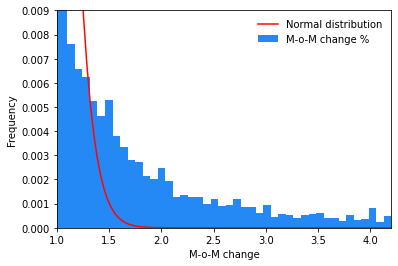

In [109]:
plt.ylim(0,0.009)
plt.xlim(1,4.2)
plt.hist(all_returns, bins=1000, density=True, label="M-o-M change %")
gaussian = np.random.normal(alpha, sigma, 10_000)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
distribution = normal_dist(x, alpha, sigma)

plt.plot(x,distribution, label="Normal distribution")
plt.xlabel("M-o-M change")
plt.ylabel("Frequency")
plt.legend(frameon=False);

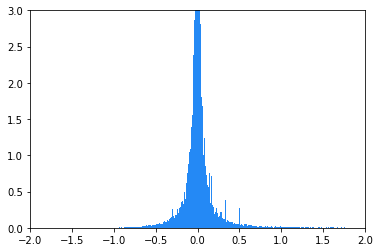

In [111]:
plt.ylim(0,3)
plt.xlim(-2,2)
hist = plt.hist(all_returns, bins=48_000, density=True, label="M-o-M change %")

In [60]:
histogram_y = hist[0]
x = hist[1]
bar_width = x[1]-x[0]

In [77]:
comparison_start_lower_bound = 1.8
actual_comparison_start = None
for i in range(len(x)):
    if x[i] >= comparison_start_lower_bound:
        actual_comparison_start = x[i]
        hist_area = sum(histogram_y[i:] * bar_width)
        cdf = 1-norm.cdf(actual_comparison_start,loc=alpha, scale=sigma)
        break
        


In [96]:
print(f"From x={round(actual_comparison_start,2)} the area of the actual bars to the gaussian estimate are {round(hist_area/cdf,2)}x")

From x=1.8 the area of the actual bars to the gaussian estimate are: 966.6x


In [92]:
print(f"The kurtosis of the Gaussian normal distribution: {kurtosis(gaussian, fisher=False)} ")
print(f"The kurtosis of the actual distribution: {kurtosis(all_returns, fisher=False)} ")

The kurtosis of the Gaussian normal distribution: 2.974091895367371 
The kurtosis of the actual distribution: 4798.0589525808455 
